# Módulo 2
**Desarrollo de proyectos de análisis de datos  IN1002B**

### Visualización

**Librerías**

Importaremos las librerías más comunmente utilizadas con pandas para temas de visualización.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IN1002B_204/treadmill.csv')

## Caso de estudio

Parte de estas respuestas serán solicitadas en su actividad 2.3.

Se pide hacer un análisis de la siguiente base de datos sobre la venta de maquinas para correr.
<br>
El objetivo es diseñar campañas que abarquen diferentes segmentos de compradores, lo anterior desarrollando un perfil general de los compradores.
<br>
Las columnas contienen la siguiente información:

- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run


Se espera dar respuesta a las siguientes preguntas en su actividad 2.3:

1. ¿Que edad promedio tienen los clientes que usan las maquinas para correr?

2. ¿Podemos utilizar el promedio como una medida valida?

3. ¿Hay alguna diferencia entre el estado físico de hombres y mujeres?

4. ¿Existe una relación entre la edad y las millas que corre una persona? Si la respuesta es sí, escribe tus observaciones.

5. Relacionado a la pregunta anterior, si lo que se desea es generar una campaña publicitaria que impacte a la mayor parte de los compradores ¿que recomendación de segmentos darías? (Eg. por edad, sexo, estado marital, etc.)

Las preguntas serán analizadas al final del código.

## **Limpieza**

1. **Datos fatantes:**

In [4]:
# shape
data.shape

(180, 9)

In [7]:
#isnull()
data.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


2. **Identificar el tipo de dato:**

In [8]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
#head()
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


```Seaborn```

Seaborn es una interfaz de alto nivel para crear gráficos estadísticos. Está construido sobre Matplotlib y proporciona una interfaz más sencilla e intuitiva para crear gráficos estadísticos comunes.

```Matplot```

Matplotlib es una biblioteca para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas o arrays



# **Datos cuantitativos**
- **Income**

Este primer valor será analizado con la función de ```Seaborn``` llamada ```histplot``` y en ```Matplot``` se llama ```plt.hist()```.

Ambas funciones otorgan resultados similares, el principal cambio se ve en la manera de editar y llamar a las funciones.

### **Histogramas**

Los histogramas son una de las herramientas más utilizadas para conocer las distribuciones de los datos.

Un histograma es similar en apariencia a un diagrama de barras, pero en lugar de comparar categorías o buscar tendencias a lo largo del tiempo, cada barra representa cómo se distribuyen los datos en una única categoría.

In [10]:
# info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


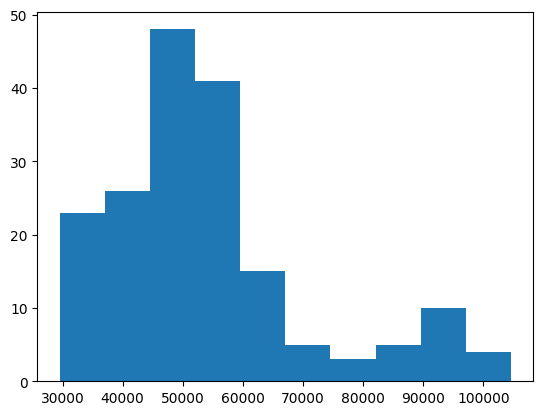

In [11]:
# Matplot -> plt.hist
plt.hist(data.Income)
plt.show()

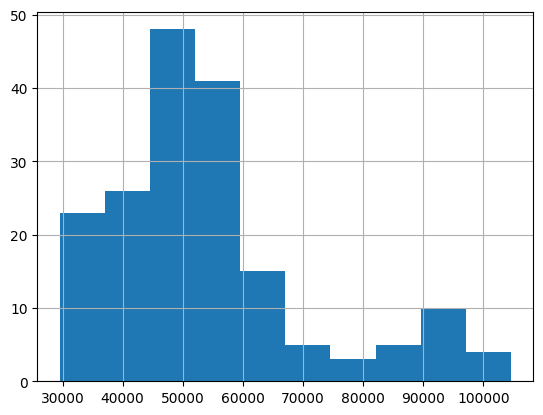

In [12]:
# agregar grid(True)
plt.hist(data.Income)
plt.grid(True)
plt.show()

- **Age**

<Axes: xlabel='Age', ylabel='Count'>

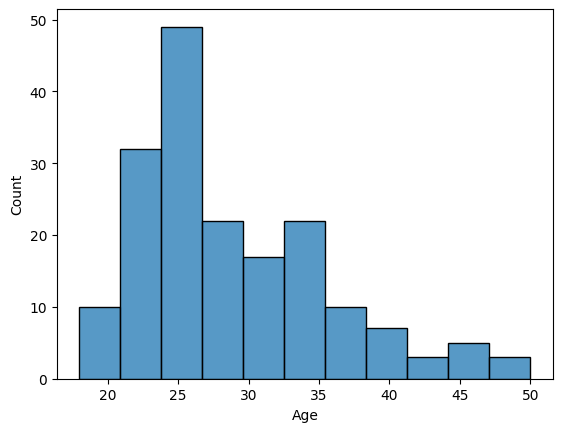

In [13]:
# lo mismo, pero ahora en seaborn
sns.histplot(data = data, x = 'Age')

<Axes: xlabel='Age', ylabel='Count'>

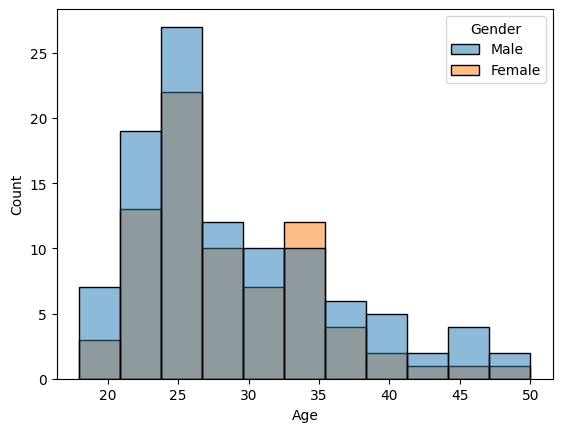

In [14]:
# Agreguemos hue = 'Gender' dentro de nuestra función
sns.histplot(data = data, x = 'Age', hue = 'Gender')

<Axes: xlabel='Age', ylabel='Count'>

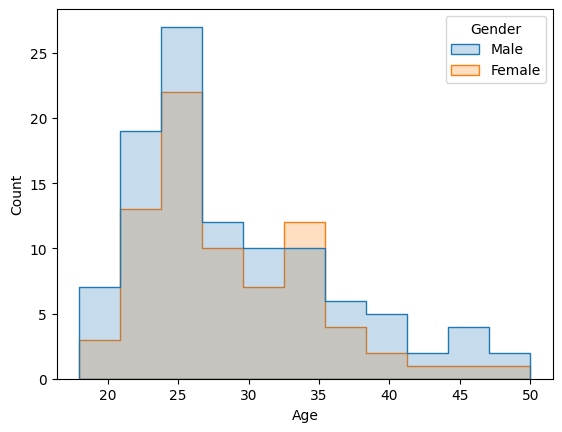

In [15]:
# Se sobreponen, entonces les sugiero agregar tambien element="step"
sns.histplot(data = data, x = 'Age', hue = 'Gender', element="step")

## **Diagrama de caja y bigote**

 Un diagrama de cajas y bigotes es una manera conveniente de mostrar visualmente grupos de datos numéricos a través de sus cuartiles.

El cuartil es un término utilizado en estadística que se refiere a los valores que dividen un conjunto de datos, ordenados de menor a mayor, en cuatro partes iguales.

Estos puntos de división nos ayudan a entender cómo se distribuyen los datos dentro de un conjunto. Se identifican tres cuartiles específicos: el primer (Q1), el segundo(Q2), y el tercer cuartil (Q3).

El primero (Q1) engloba el 25% de los datos inferiores del conjunto, el segundo (Q2), también conocido como la mediana, divide el conjunto en mitades iguales, y el tercero (Q3) abarca hasta el 75% de los datos, dejando el 25% superior por encima de este.

Las líneas que se extienden paralelas a las cajas se conocen como «**bigotes**», y se usan para indicar variabilidad fuera de los cuartiles superior e inferior.

 Los **valores atípicos** se representan a veces como puntos individuales que están en línea con los bigotes. Los diagramas de cajas y bigotes se pueden dibujar vertical u horizontalmente.


In [16]:
# describe()
data.Income.describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


<Axes: ylabel='Income'>

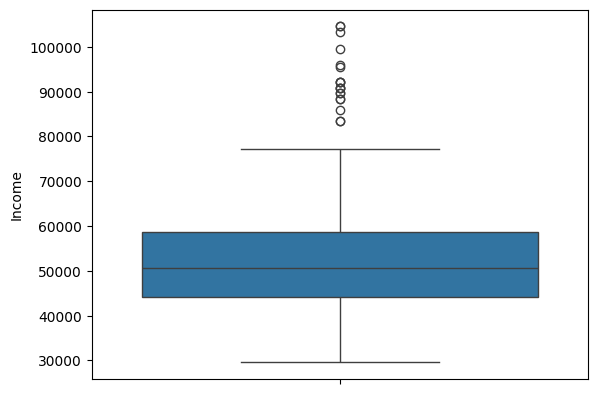

In [17]:
sns.boxplot(data = data, y = 'Income')

# **Datos cualitativos**

### **Gráfico de barras**

```countplot()```

https://seaborn.pydata.org/generated/seaborn.countplot.html

Realicemos un gráfico por cada una de las variables cualitativas:

In [19]:
# head()
data.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75


<Axes: xlabel='Product', ylabel='count'>

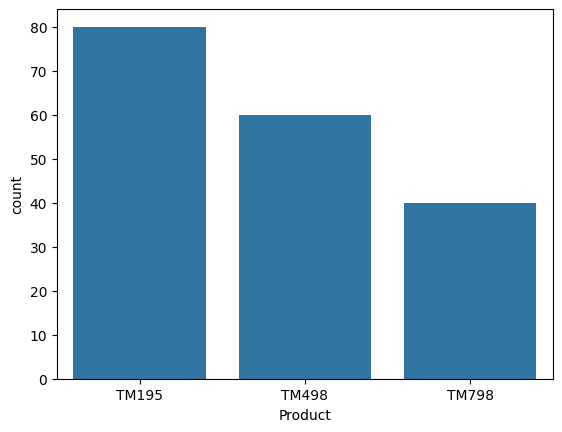

In [20]:
# sns.countplot() -> Product
sns.countplot(x = data['Product'])

<Axes: xlabel='Fitness', ylabel='count'>

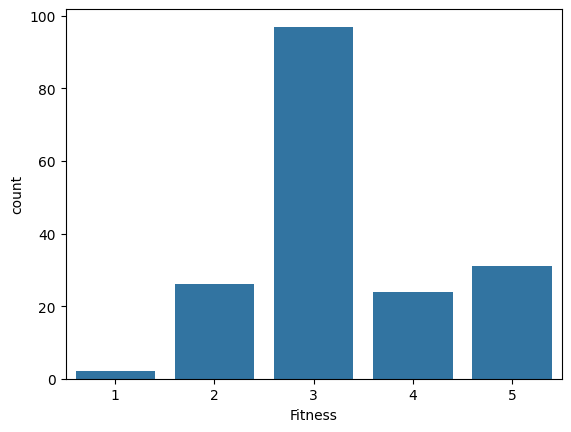

In [21]:
# Variable 2
sns.countplot(x = data['Fitness'])

In [ ]:
# Variable 3


In [ ]:
# Variable 4


In [ ]:
# Variable 5


***¿Consideran que los gráficos anteriores son suficientes para la creación de un reporte?***

Vamos a crear con otra función de ```seaborn``` gráficos  con más información. De tal forma que puedan en una imagen resolver multiples preguntas de investigación.



```catplot()```

https://seaborn.pydata.org/generated/seaborn.catplot.html

El siguiente gráfico tendrá las siguientes características:


1.   Grafico de barras donde se mostrarán los ingresos respecto al género.
2.   Dentro de cada género, se crearán barras inicando el tipo de prodicto. cada barra tendrá un color diferente.



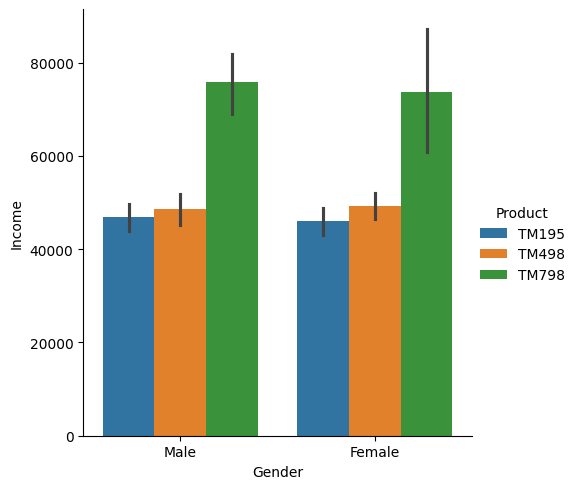

In [22]:
sns.catplot(data=data, y="Income", x="Gender", hue="Product", kind="bar")

Realicemos otro gráfico, consideremos las mismas variables ```x``` y ```y```, cambiando el valor de ```hue = ''``` por uno de su interés.

Solo recuenden que ```hue = ''``` forzosamente debe de ser una categoría.



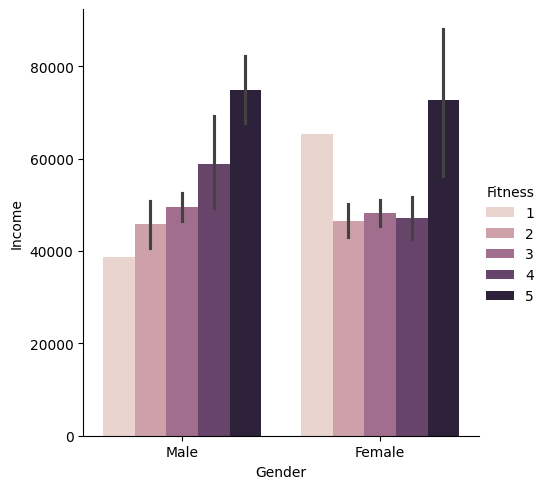

In [24]:
sns.catplot(data=data, y="Income", x="Gender", hue="Fitness", kind="bar")

Eliminemos el parámetro de ```kind = ''``` y volvamos a ejecutar ese código en una línea nueva:

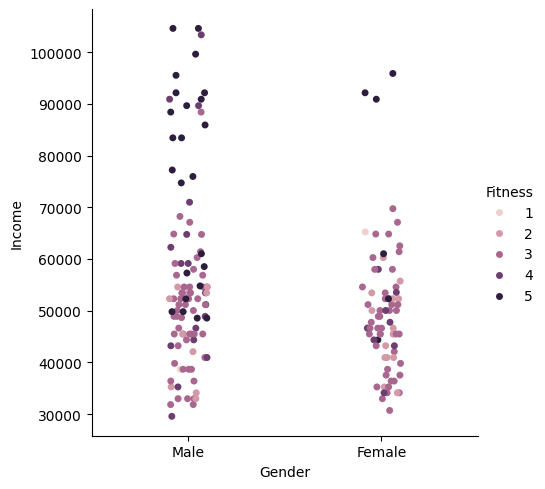

In [25]:
sns.catplot(data=data, y="Income", x="Gender", hue="Fitness")

## **Tablas**

La función ```crosstab()``` nos permite unir dos variables y realizar un conteo de frecuencias o bien alguna otra función (media, mediana, moda, max, min, etc).



In [26]:
pd.crosstab(data['Product'],data['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


### **Tablas pivote**

Podemos obtener un resultado similar por medio de tablas pivote, la ventaja es que podemos jugar con más variables.

En el siguiente ejemplo, la tabla tendrá la siguiente estructura:



*   Índice: producto
*   Columnas: género
*   Función agregada: promedio de ingresos


In [27]:
data.pivot_table(index = "Product", columns = "Gender", aggfunc = {"Income": 'mean'})

Income              
Gender         Female          Male
Product                            
TM195    46020.075000  46815.975000
TM498    49336.448276  48634.258065
TM798    73633.857143  75825.030303

### **Gráfico de pay**

Actualmente, este gráfico no puede realizarse en ```seaborn```, por lo que utilizaremos ```matplot``` :)

La función ```plot.pie()``` nos pide tener un formaro especifico como variable de entrada.

Lo que se necesita es una tabla o un dataframe con las variables que deseamos graficas y el conteo de frecuencias de cada una de ellas.

Para lograrlo podemos hacer lo siguiente:

In [41]:
fitness = data.Fitness.value_counts().rename_axis('unique_values').to_frame('counts')
fitness

,counts
unique_values,
3,97
5,31
2,26
4,24
1,2


<Axes: ylabel='counts'>

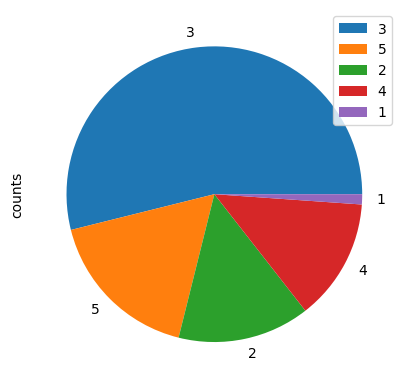

Ahora, seleccionen una variable de su interes que siga las características del ejemplo anterior.

Recuerden crear el mini dataframe previo a llamar ```plot.pie()```

In [ ]:
# dataframe



#plot.pie()

## **Gráficos de tendencia**

### **Gráficos de línea**

Para el siguiente ejemeplo utilizaremos la base de datos de supermarket_sales en conjunto con la función ```lineplot()```.


https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [30]:
# cargar el archivo
sales = pd.read_csv('/content/drive/MyDrive/IN1002B_204/supermarket_sales - Sheet1.csv')

In [31]:
# head()
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [32]:
# isnull()
sales.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [33]:
# ajustes de fecha

sales['Date'] = pd.to_datetime(sales['Date'], format= '%m/%d/%Y')

Vamos ahora a crear dos columnas nuevas, una será por año y la otra por mes.

In [34]:
# Año

sales['Year'] = sales.Date.dt.year

# Mes
sales['Month'] = sales.Date.dt.month

Ahora podemos hacer un gráfico de línea con la función ```lineplot()``` de ```seaborn```.

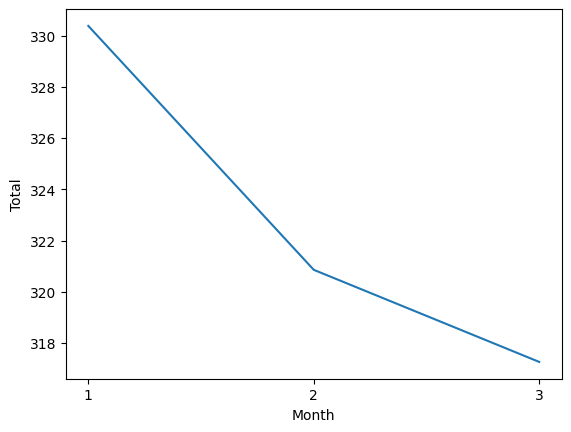

In [38]:
sns.lineplot(data=sales, y="Total", x="Month", ci = None)
# Ajustar las leyendas de eje para que aparezcan todos los meses
plt.xticks(ticks=sales['Month'].unique())

# Mostrar el gráfico
plt.show()

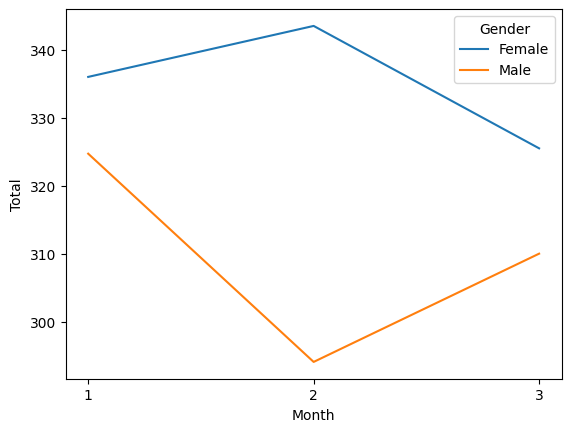

In [39]:
# Agregamos el argumento "hue" con el valor = Gender para ver la tendencia por género.
sns.lineplot(data=sales, y="Total", x="Month", ci = None, hue = 'Gender')
# Ajustar las leyendas de eje para que aparezcan todos los meses
plt.xticks(ticks=sales['Month'].unique())

# Mostrar el gráfico
plt.show()

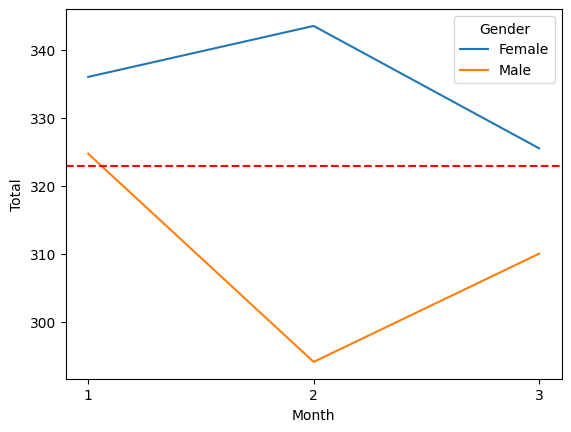

In [40]:
sns.lineplot(data=sales, y="Total", x="Month", hue = 'Gender', ci = None)
plt.xticks(ticks=sales['Month'].unique())

# Agregamos una línea de guía, mostraremos el promedio de ventas en todos los periodos
plt.axhline(y=sales.Total.mean(), color='red', linestyle='--', label='Línea Punteada')

# Mostrar el gráfico
plt.show()